#### File Author: Shruti Gupta
#### File Name: Titanic Data Set Visualizing
#### Date: 15/05/2019


#### Visualizing the Data of the Titanic Ship

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
sns.set(color_codes=True)
sns.set_style('whitegrid')

#### Retriving Data File

using data file: train.csv from TitanicDatasets

In [84]:
#loading data

titanic = pd.read_csv('../input/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Columns Details 

retrieving columns details and checking whether null or not

In [85]:
#retrieving the columns information

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [87]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

This shows that columns Age, Cabin, and Emarked have null values present in the data, thus filling or removing of the null values will be the next step

#### Handling the Missing/NULL Values

In [88]:
#filling null values in age with mean of the age
titanic['Age']=titanic['Age'].fillna(np.mean(titanic['Age'])).astype(float)
titanic['Age'].head(25)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
Name: Age, dtype: float64

In [89]:
# For Filling for Embarked it will be based on the maximum Frequence of Class

titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
titanic['Embarked']= titanic['Embarked'].fillna("S")

In [29]:
titanic['Embarked']

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [91]:
# Comfirming that there are no null values

titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

#### Calculation

possible calculations that can be done on this data

In [92]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [110]:
titanic.groupby(['Pclass','Sex','Survived']).Age.mean()

Pclass  Sex     Survived
1       female  0           25.666667
                1           34.420792
        male    0           41.489427
                1           35.520346
2       female  0           36.000000
                1           28.127118
        male    0           33.086745
                1           17.631073
3       female  0           25.206736
                1           22.930249
        male    0           27.948083
                1           23.696001
Name: Age, dtype: float64

In [109]:
titanic.groupby(['Pclass']).Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

#### Visualizing of the data

##### Graph: 1

In [44]:
titanic[['Age','Fare','Pclass','Survived']]

,Age,Fare,Pclass,Survived
0,22.000000,7.2500,3,0
1,38.000000,71.2833,1,1
2,26.000000,7.9250,3,1
3,35.000000,53.1000,1,1
4,35.000000,8.0500,3,0
5,29.699118,8.4583,3,0
6,54.000000,51.8625,1,0
7,2.000000,21.0750,3,0
8,27.000000,11.1333,3,1
9,14.000000,30.0708,2,1


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Checking the fares against age')

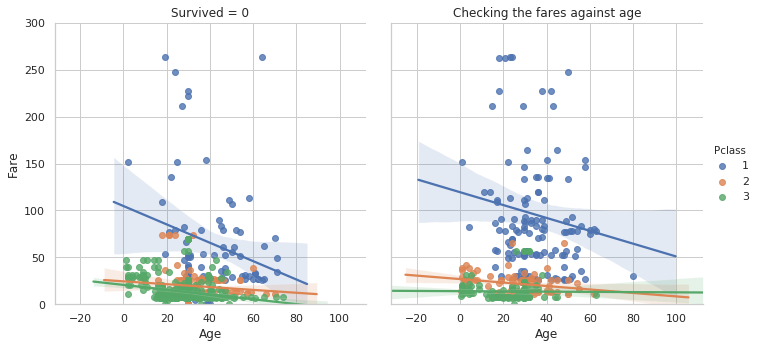

In [41]:
sns.lmplot(x = 'Age', y = 'Fare', hue='Pclass', col='Survived', data = titanic)
plt.ylim(0,300)

##### Graph: 2

In [43]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Checking the Count of Genders Onboard')

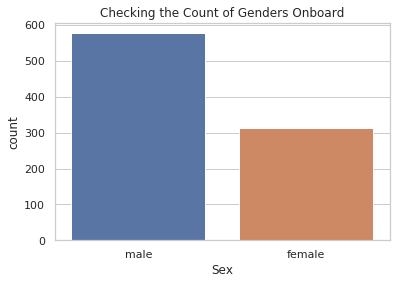

In [114]:
sns.countplot(x='Sex',data=titanic)
plt.title('Checking the Count of Genders Onboard')

##### Graph:3

In [64]:
titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

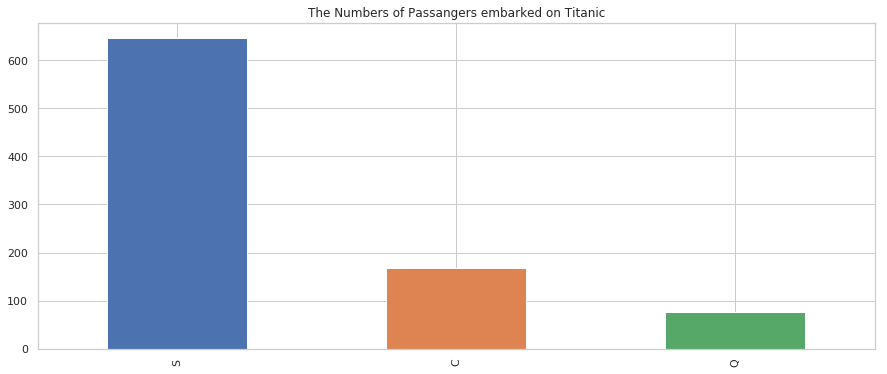

In [117]:
titanic.Embarked.value_counts().\
plot.bar(title = 'The Numbers of Passangers embarked on Titanic',figsize=(15,6)).grid(True)

##### Graph: 5

In [67]:
titanic[['Pclass','Age','Sex']]

,Pclass,Age,Sex
0,3,22.000000,male
1,1,38.000000,female
2,3,26.000000,female
3,1,35.000000,female
4,3,35.000000,male
5,3,29.699118,male
6,1,54.000000,male
7,3,2.000000,male
8,3,27.000000,female
9,2,14.000000,female


Text(0.5, 0.98, 'A Boxplot For Passenagers Class and Ages')

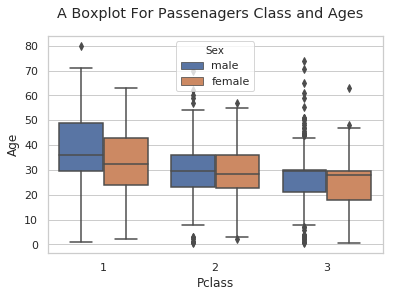

In [47]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=titanic)
plt.suptitle('A Boxplot For Passenagers Class and Ages')

##### Graph: 6

In [77]:
titanic.Fare.head(50)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
5       8.4583
6      51.8625
7      21.0750
8      11.1333
9      30.0708
10     16.7000
11     26.5500
12      8.0500
13     31.2750
14      7.8542
15     16.0000
16     29.1250
17     13.0000
18     18.0000
19      7.2250
20     26.0000
21     13.0000
22      8.0292
23     35.5000
24     21.0750
25     31.3875
26      7.2250
27    263.0000
28      7.8792
29      7.8958
30     27.7208
31    146.5208
32      7.7500
33     10.5000
34     82.1708
35     52.0000
36      7.2292
37      8.0500
38     18.0000
39     11.2417
40      9.4750
41     21.0000
42      7.8958
43     41.5792
44      7.8792
45      8.0500
46     15.5000
47      7.7500
48     21.6792
49     17.8000
Name: Fare, dtype: float64

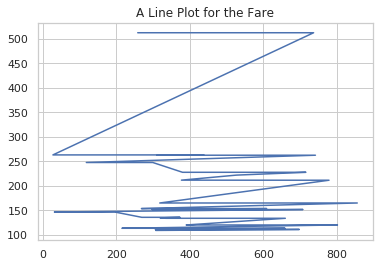

In [82]:
titanic.Fare.nlargest(50).plot(title = 'A Line Plot for the Fare').grid(True)

##### Graph: 7

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'A distribution Plot for the Age')

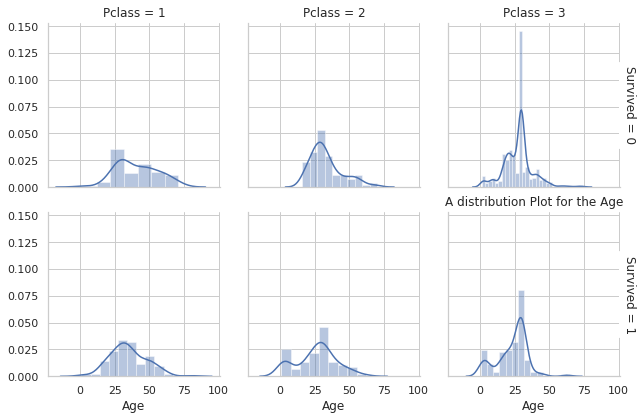

In [97]:
g = sns.FacetGrid(titanic, col="Pclass", row="Survived", margin_titles=True)
g.map(sns.distplot, "Age");
plt.title('A distribution Plot for the Age')

##### Graph: 8

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


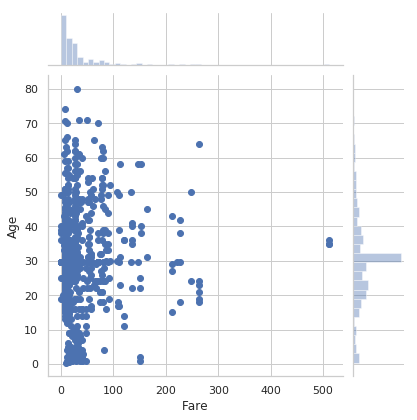

In [96]:
sns.jointplot(x='Fare',y='Age',data=titanic)

##### Graph: 9

In [94]:
tc = titanic.corr()
tc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Correlation of the Titanic')

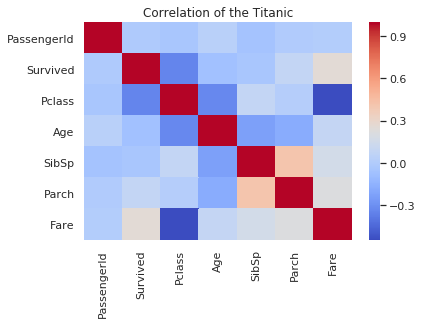

In [95]:
sns.heatmap(tc,cmap='coolwarm')
plt.title('Correlation of the Titanic')

##### Graph 10

In [100]:
titanic.groupby(['Pclass','Sex','Survived']).Age.mean()

Pclass  Sex     Survived
1       female  0           25.666667
                1           34.420792
        male    0           41.489427
                1           35.520346
2       female  0           36.000000
                1           28.127118
        male    0           33.086745
                1           17.631073
3       female  0           25.206736
                1           22.930249
        male    0           27.948083
                1           23.696001
Name: Age, dtype: float64

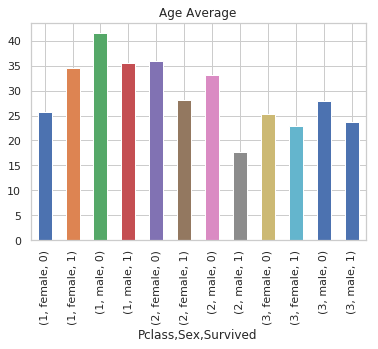

In [101]:
titanic.groupby(['Pclass','Sex','Survived']).Age.mean().\
plot.bar(title='Age Average')

##### Graph: 11

In [106]:
titanic.groupby(['Pclass']).Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

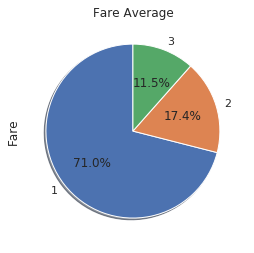

In [108]:
titanic.groupby(['Pclass']).Fare.mean().\
plot.pie(title='Fare Average',autopct='%1.1f%%', startangle=90, shadow = True)